In [1]:
import pydot
import math
from collections import defaultdict 
from IPython.display import Image, display

In [2]:
def lstr(p):
        return ''.join([str(elem)  for elem in p])

In [3]:
def pope(graph,elem):
  max=0
  for i in graph[elem]:
    n=1+pope(graph,i)
    if (max<n):
      max = n
  graph.pop(elem)
  return max


In [4]:
def get_first_key(dictionary):
    for key in dictionary:
        return key
    raise IndexError

In [5]:
def pn(s): 
        # Mark the source node as visited and enqueue it 
         # Create dictionaries graph,visited and pydot graph G
         graph = defaultdict()
         visited = defaultdict()
        # Create a queue for BFS 
         queue = [] 
         queue.append(s) 
         visited[lstr(s)] = True
         while queue: 
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it
            for i in range(len(s)-1):
                  d = s[i+1::-1] + s[i+2:]
                  if (d != s) and not(lstr(d) in visited.keys()):
                    graph[lstr(s)].append(lstr(d))
                    queue.append(d) 
                    visited[lstr(d)] = True 
         return pope(graph,get_first_key(graph))

In [20]:
def ModifiedBFS(s): 
        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        visitedn = defaultdict()
        visitednodes = defaultdict()
        n=0
        nedq=len(s)-1
        ned= math.factorial(len(s))
        G = pydot.Dot(graph_type="graph")
        # Create a queue for BFS 
        queue = [] 
        # Mark the source node as visited and enqueue it 
        queue.append(s)
        visited[lstr(s)] = True
        visitedn[lstr(s)] = 0
        visitednodes[lstr(s)] = []
    
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            if not(lstr(s) in graph.keys()):
              graph[lstr(s)]=[]
            flag = False
            for i in range(len(s)-1):
                for j in range(i+1,len(s)):
                    if i!=0:
                      d = s[:i] + s[j:i-1:-1] + s[j+1:]
                    else:
                      d = s[j::-1] + s[j+1:]
                if(d == sorted(d)):
                     flag = True
            if flag:
              node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
            else: 
              node = pydot.Node(lstr(s))

            G.add_node(node)
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if (n<ned):
              for i in range(len(s)-1):
                for j in range(i+1,len(s)):
                    if i!=0:
                      d = s[:i] + s[j:i-1:-1] + s[j+1:]
                    else:
                      d = s[j::-1] + s[j+1:]  
                if (d != s) or not(lstr(d) in visited.keys()):

                  if (d != sorted(d)):
                    node = pydot.Node(lstr(d))
                    
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                    n+=1
                  if not(lstr(d) in graph[lstr(s)]):  
                    G.add_node(node)
                    edge = pydot.Edge(lstr(s),lstr(d))
                    G.add_edge(edge)
                    graph[lstr(s)].append(lstr(d))
                    if (not(lstr(d) in visitedn.keys())):
                      visitedn[lstr(d)] = 1 
                      queue.append(d)    
                    else:
                      visitedn[lstr(d)] = visitedn[lstr(d)] + 1 
                  
                  if (visitedn[lstr(d)] == nedq):
                    visited[lstr(d)] = True
                    
                    
                    
              
        # Dsplay the pydot graph G
        G.set_simplify(True)
        im = Image(G.create_png())
        display(im)
        print("para una  pila de n pancakes = ",len(s),", Pn será =",pn(s))

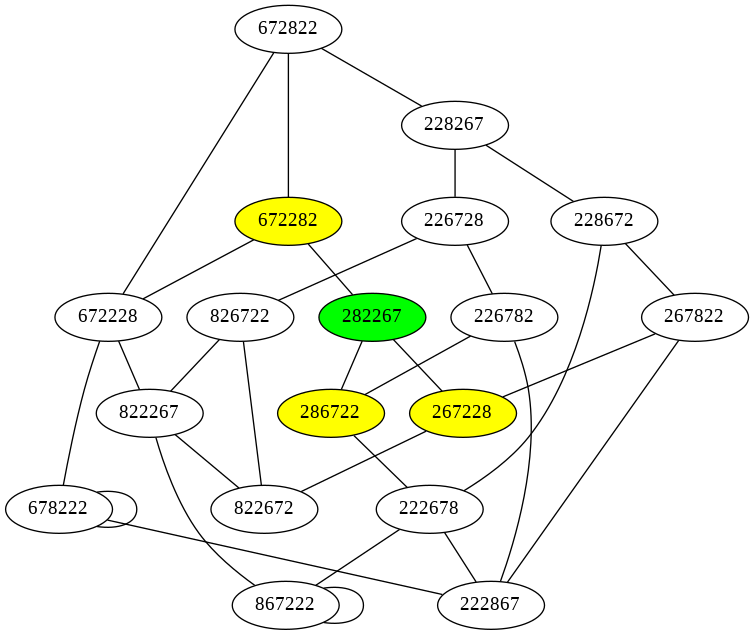

para una  pila de n pancakes =  4 , Pn será = 4


In [24]:
p = [67,2,8,22]
ModifiedBFS(p)